**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [2]:
df = pd.read_csv('C:/Users/metam/Pitjarus/Test Kerja (Portofolio)/Analysis/Healthcare Analysis/dataset/healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


**Explore Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [7]:
df.shape

(10000, 15)

**Analysis Data**

In [8]:
# Numerical Data
df.describe(exclude=['O'])

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


**Distribution of Blood Types**

In [9]:
df['Blood Type'].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

**Relation between Gender and Blood Types**

In [10]:
df.groupby(['Gender'])['Blood Type'].value_counts()

Gender  Blood Type
Female  AB-           671
        O+            641
        B+            640
        AB+           637
        B-            635
        A-            633
        A+            629
        O-            589
Male    O-            655
        AB+           621
        B-            617
        A+            612
        O+            607
        A-            605
        AB-           604
        B+            604
Name: Blood Type, dtype: int64

**Relation between Gender and Medical Condition**

In [11]:
df.groupby(['Medical Condition'])['Gender'].value_counts()

Medical Condition  Gender
Arthritis          Male      835
                   Female    815
Asthma             Female    874
                   Male      834
Cancer             Female    887
                   Male      816
Diabetes           Female    825
                   Male      798
Hypertension       Male      852
                   Female    836
Obesity            Female    838
                   Male      790
Name: Gender, dtype: int64

**Relational between Medication and Medical Condition**

In [12]:
df.groupby(['Medication'])['Medical Condition'].value_counts()

Medication   Medical Condition
Aspirin      Asthma               370
             Diabetes             335
             Hypertension         328
             Arthritis            322
             Obesity              322
             Cancer               291
Ibuprofen    Cancer               352
             Asthma               340
             Hypertension         335
             Obesity              328
             Arthritis            320
             Diabetes             301
Lipitor      Hypertension         356
             Cancer               350
             Asthma               346
             Diabetes             326
             Obesity              319
             Arthritis            318
Paracetamol  Cancer               346
             Obesity              332
             Diabetes             327
             Arthritis            324
             Hypertension         323
             Asthma               310
Penicillin   Arthritis            366
             Cancer

**Relational between Gender and Admission Type**

In [13]:
df.groupby(df['Gender'])['Admission Type'].value_counts()

Gender  Admission Type
Female  Urgent            1734
        Emergency         1701
        Elective          1640
Male    Emergency         1666
        Urgent            1657
        Elective          1602
Name: Admission Type, dtype: int64

**Duration of Stay(Days)**

In [14]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Duration of Stay (Days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df[['Date of Admission', 'Discharge Date', 'Duration of Stay (Days)']].head(10)

,Date of Admission,Discharge Date,Duration of Stay (Days)
0,2022-11-17,2022-12-01,14
1,2023-06-01,2023-06-15,14
2,2019-01-09,2019-02-08,30
3,2020-05-02,2020-05-03,1
4,2021-07-09,2021-08-02,24
5,2020-08-20,2020-08-23,3
6,2021-03-22,2021-04-15,24
7,2019-05-16,2019-06-02,17
8,2020-12-17,2020-12-22,5
9,2022-12-15,2022-12-16,1


**Max stay duration 30 days**

In [15]:
new_df = df[df['Duration of Stay (Days)'] == df['Duration of Stay (Days)'].max()]
new_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Duration of Stay (Days)
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
20,William Johnson,55,Female,AB+,Arthritis,2023-02-25,Kelly Thompson,Pearson LLC,Aetna,32263.622157,238,Emergency,2023-03-27,Penicillin,Normal,30
81,Douglas Crawford,34,Male,AB+,Arthritis,2023-08-16,Joseph Santiago,Stephens and Sons,Blue Cross,26440.396726,142,Elective,2023-09-15,Lipitor,Abnormal,30
83,Kimberly Vargas,27,Female,B+,Obesity,2018-12-28,Donald Nelson,"Jarvis, Walker and Grant",Aetna,5319.542763,139,Elective,2019-01-27,Aspirin,Abnormal,30
84,Travis Walker,70,Female,A-,Arthritis,2019-01-12,Nathan Colon,"Ramirez, Graham and Wright",Medicare,44047.144242,482,Elective,2019-02-11,Penicillin,Normal,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,John Hall,68,Female,AB+,Cancer,2020-08-17,Nicole Rubio,Mcknight-Li,Blue Cross,35388.828316,206,Emergency,2020-09-16,Paracetamol,Normal,30
9777,Hayden Lopez,32,Female,AB-,Diabetes,2020-06-27,Danielle Mays,Jones Ltd,Aetna,34773.116723,139,Elective,2020-07-27,Lipitor,Abnormal,30
9800,Jonathan Anderson,65,Male,O+,Asthma,2023-02-13,Joseph Jackson,Herring PLC,Medicare,44948.769882,257,Emergency,2023-03-15,Penicillin,Inconclusive,30
9859,Tammy Franco,77,Male,B-,Obesity,2020-06-30,Heather Bates,"Mccormick, Hines and Simmons",UnitedHealthcare,8056.605525,176,Emergency,2020-07-30,Aspirin,Abnormal,30


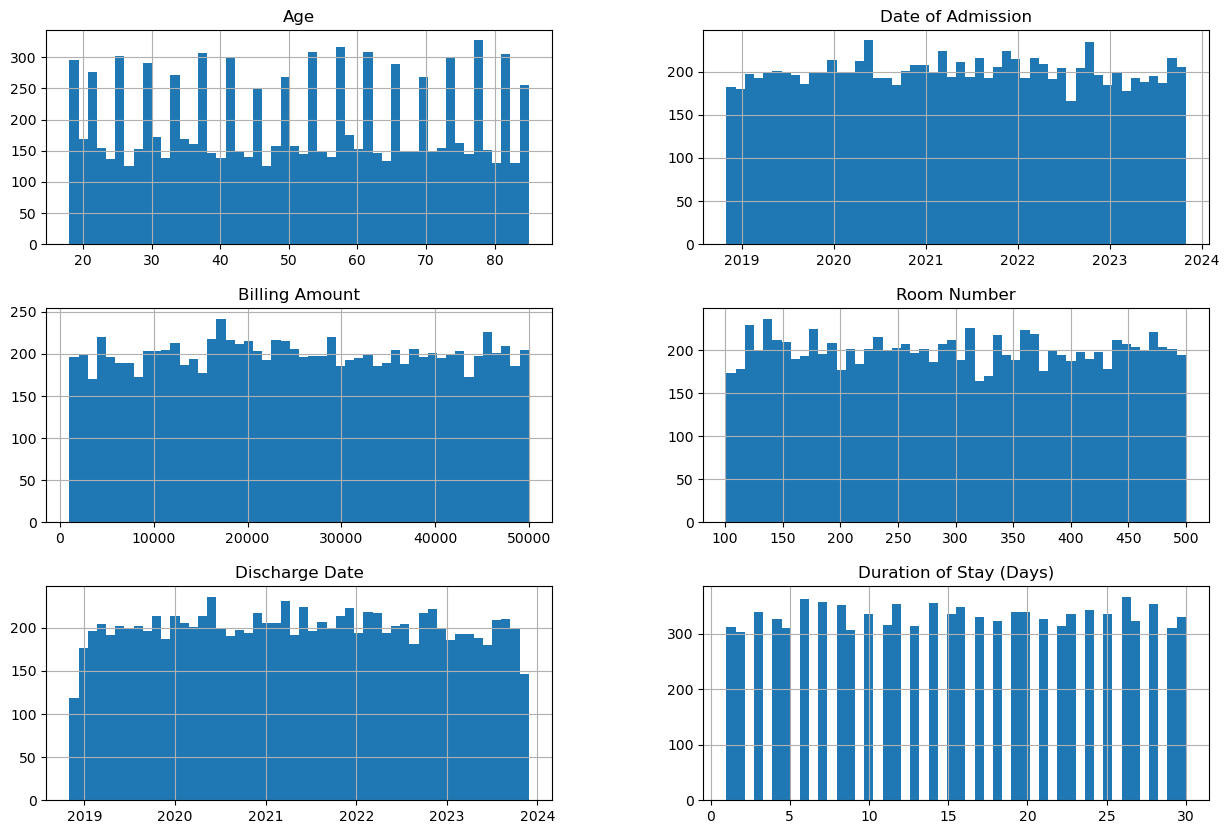

In [16]:
df.hist(bins=50,figsize=(15,10))
plt.show()

<Axes: >

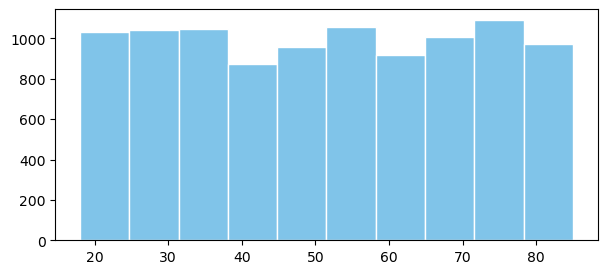

In [17]:
df.Age.hist(edgecolor='White', figsize=(7,3), grid=False, color='#80C4E9')

In [18]:
# Categorical Data
df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,9416,8639,5,3,5,3
top,Michael Johnson,Female,AB-,Asthma,Michael Johnson,Smith PLC,Cigna,Urgent,Penicillin,Abnormal
freq,7,5075,1275,1708,7,19,2040,3391,2079,3456


In [19]:
cols = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results']

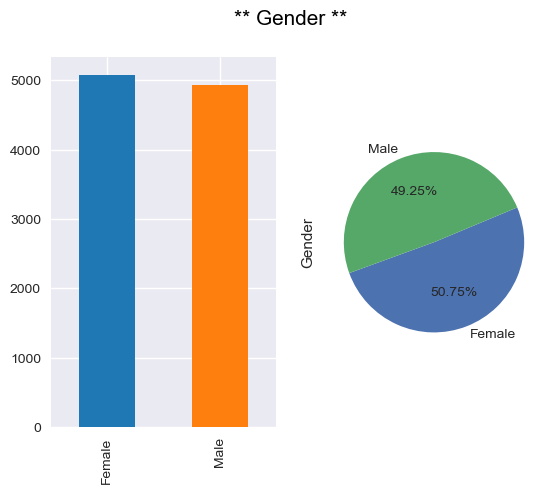

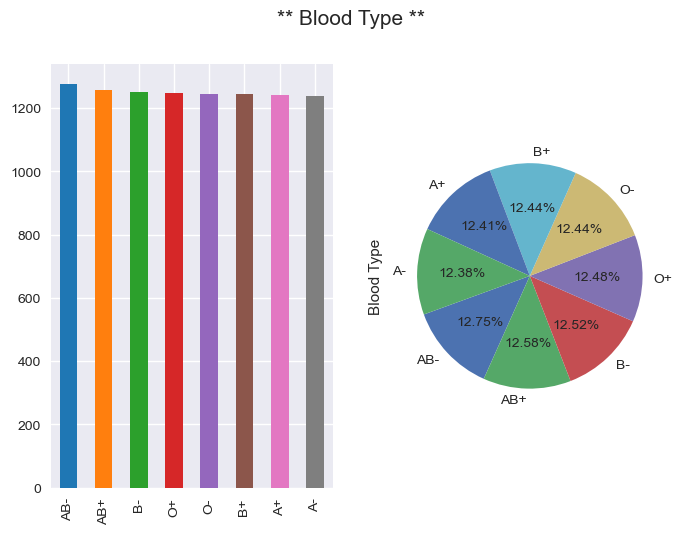

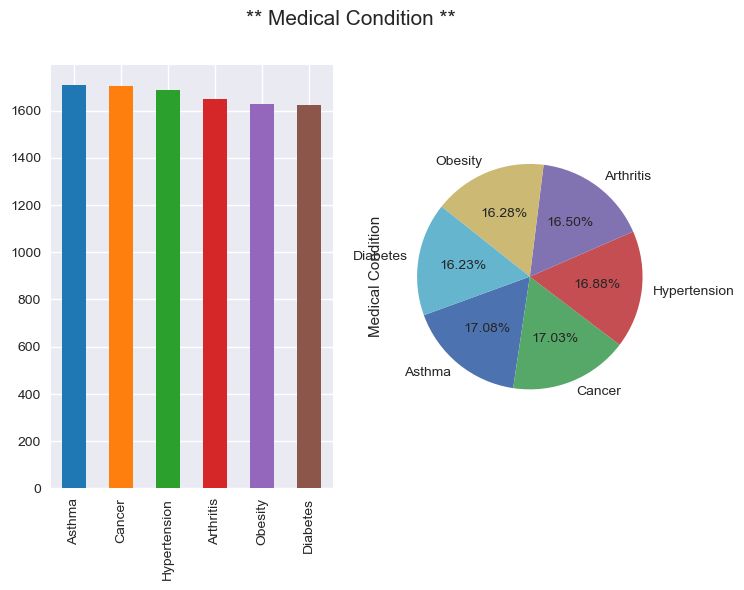

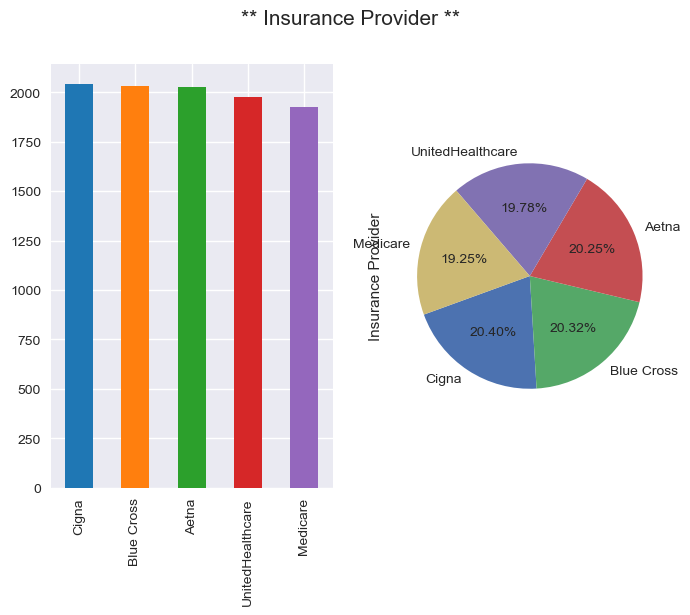

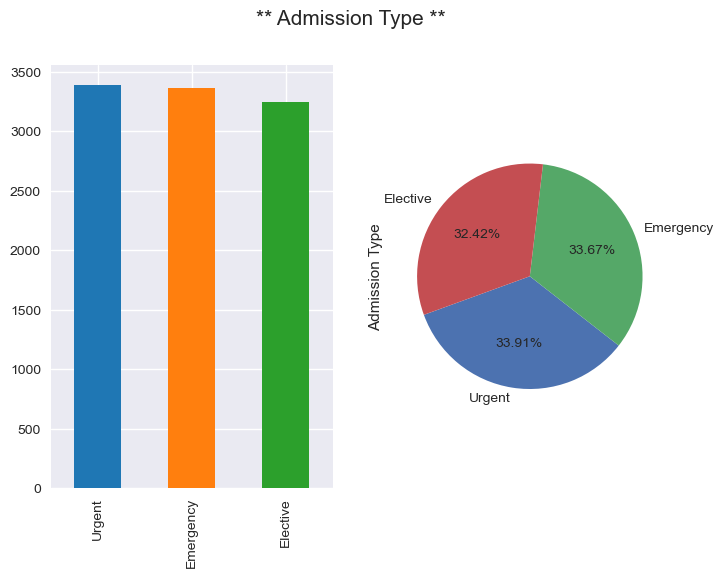

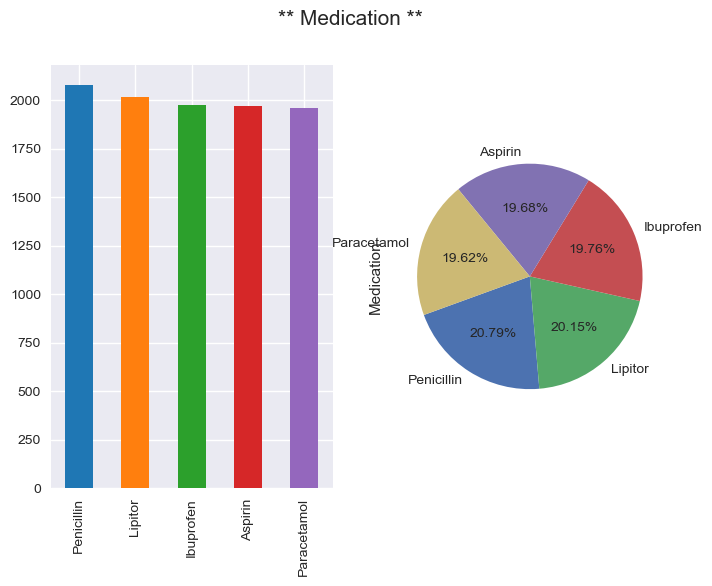

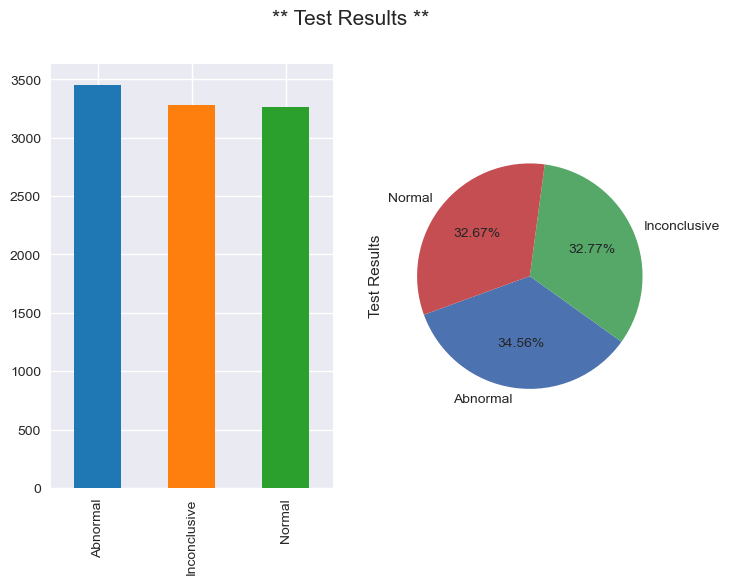

In [20]:
# Categorical Features
for i in cols:
    if i == 'Gender':
        fig, ax = plt.subplots(1, 20)
        fig.suptitle('** Gender **', fontsize=15)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar', color=sns.color_palette('tab10'))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%', startangle=200)
        plt.show()
    else:
        fig, ax = plt.subplots(1, 20)
        fig.suptitle('** ' + i + ' **', fontsize=15)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar', color=sns.color_palette('tab10'))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie', autopct='%.2f%%', startangle=200)
        plt.show()

In [21]:
cols = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results']

In [22]:
for i in cols:
    if i == 'Gender':
        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=('Billing Amount'), ascending=False)
        top = char_bar.head()
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top['Billing Amount']))
        fig.update_layout(title='Highest Gender According to ' + 'Billing Amount',
                         xaxis_title = 'Gender', yaxis_title='Billing Amount',
                         plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))
        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)
    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=['Billing Amount'], ascending=False)
        top = char_bar.head()
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount']))
        fig.update_layout(title='Highest ' + i + ' According to Billing Amount',
                         xaxis_title= i,yaxis_title='Billing Amount',
                         plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))
        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

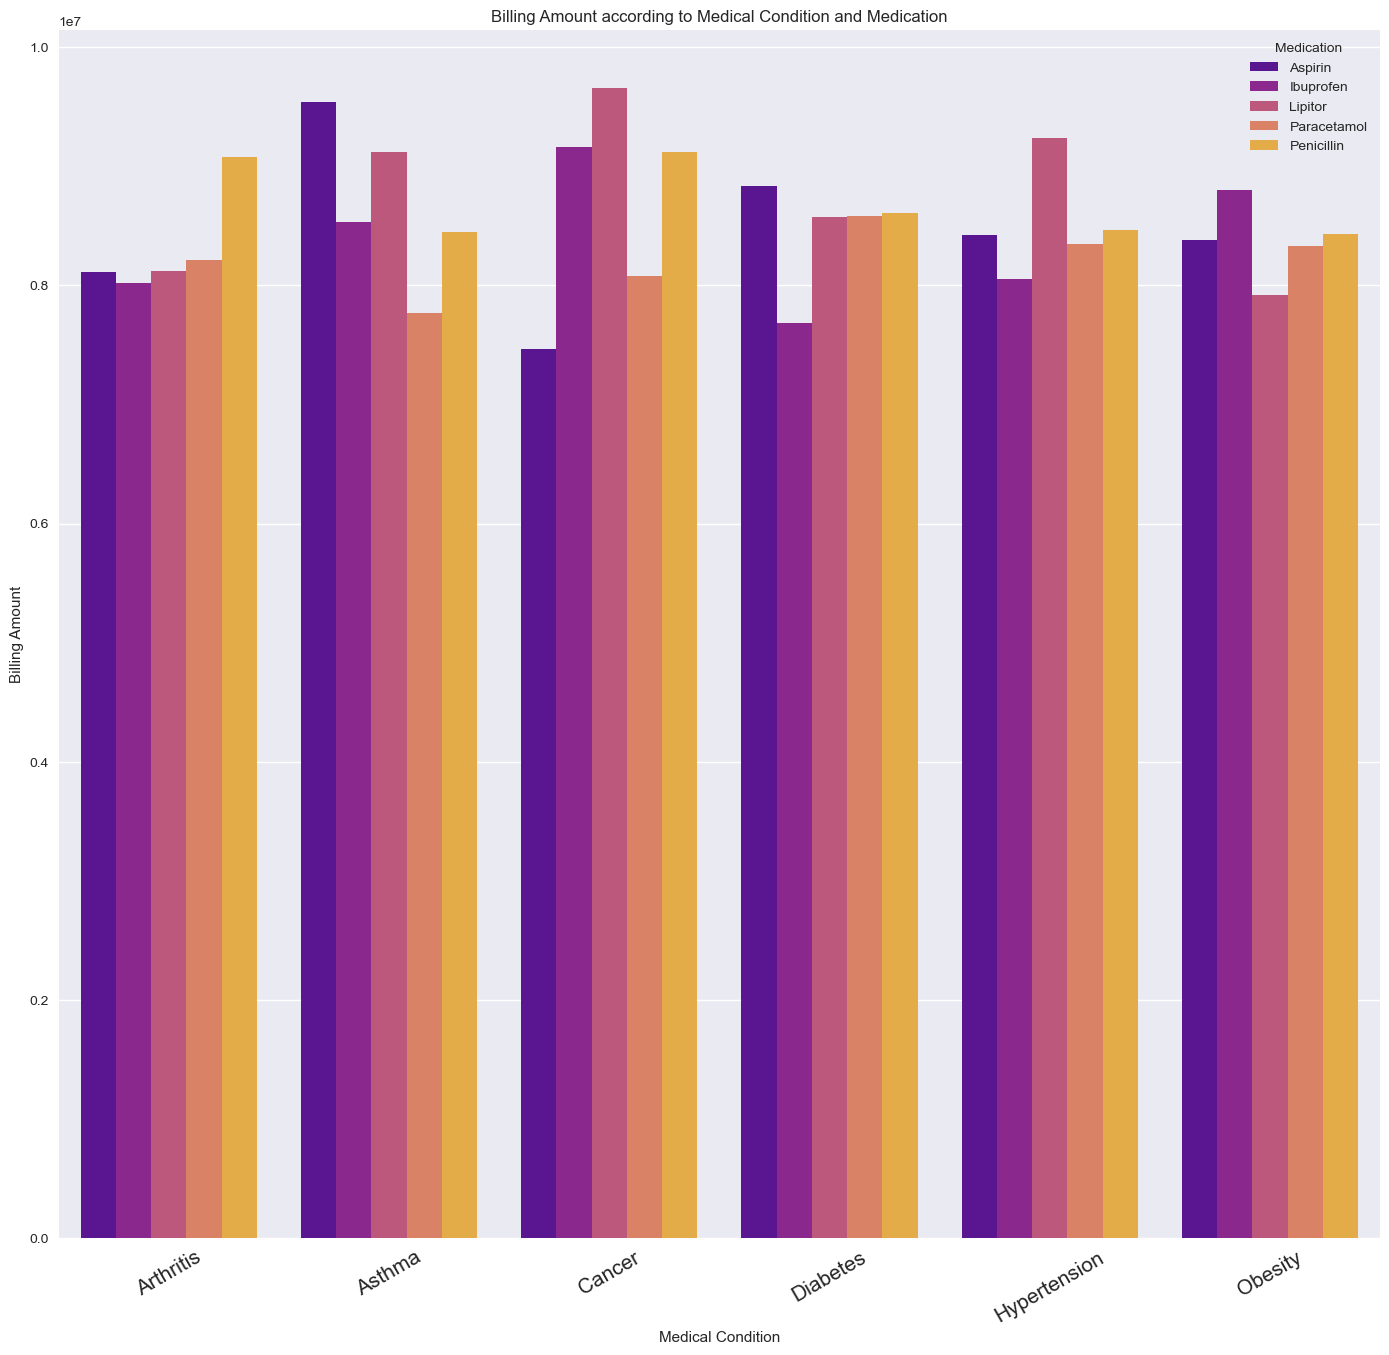

In [23]:
# Billing Amount according to Medical Condition and Medication
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(14,13))
sns.barplot(data=df_trans, x='Medical Condition', y='Billing Amount', hue='Medication', ci=None, palette='plasma')
plt.title('Billing Amount according to Medical Condition and Medication')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.xticks(rotation=30, fontsize=15)
plt.show()

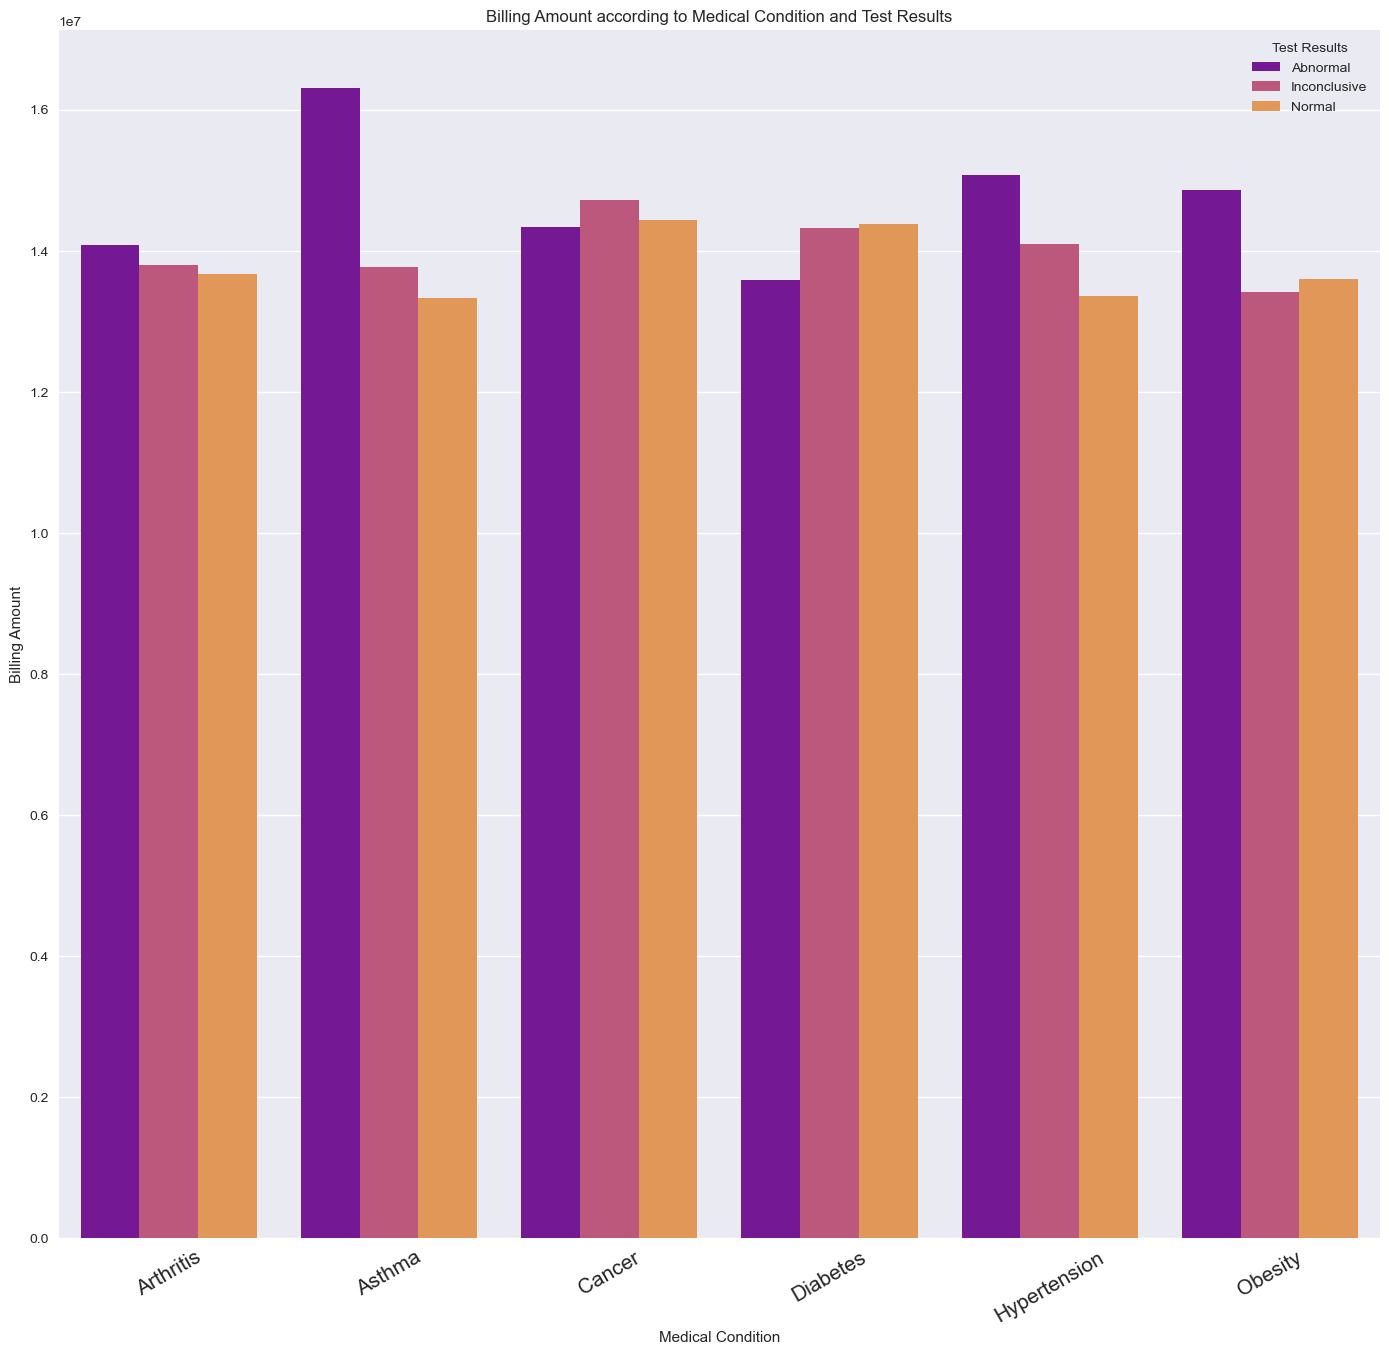

In [24]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(14,13))
sns.barplot(data=df_trans, x='Medical Condition', y='Billing Amount', hue='Test Results', ci=None, palette='plasma')
plt.title('Billing Amount according to Medical Condition and Test Results')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.xticks(rotation=30, fontsize=15)
plt.show()

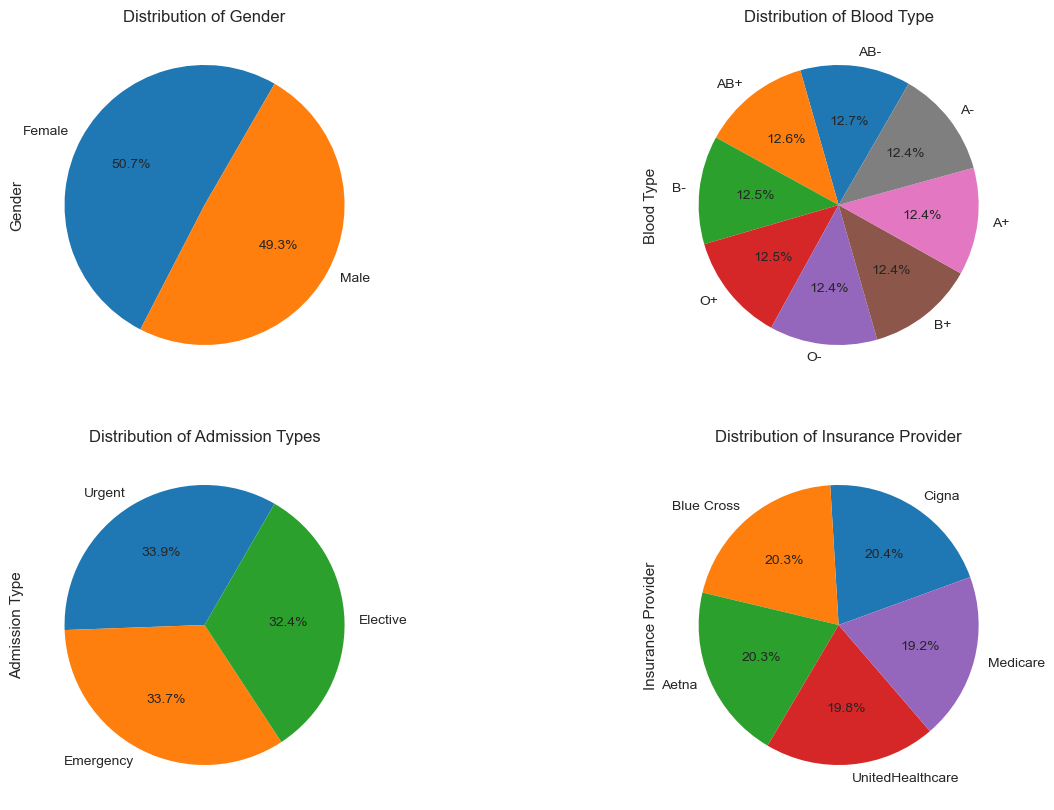

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Distribution of Gender')
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=60, colors=sns.color_palette('tab10'))
plt.subplot(2,2,2)
plt.title('Distribution of Blood Type')
df['Blood Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=60, colors=sns.color_palette('tab10'))
plt.subplot(2,2,3)
plt.title('Distribution of Admission Types')
df['Admission Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=60, colors=sns.color_palette('tab10'))
plt.subplot(2,2,4)
plt.title('Distribution of Insurance Provider')
df['Insurance Provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=20, colors=sns.color_palette('tab10'))
plt.show()

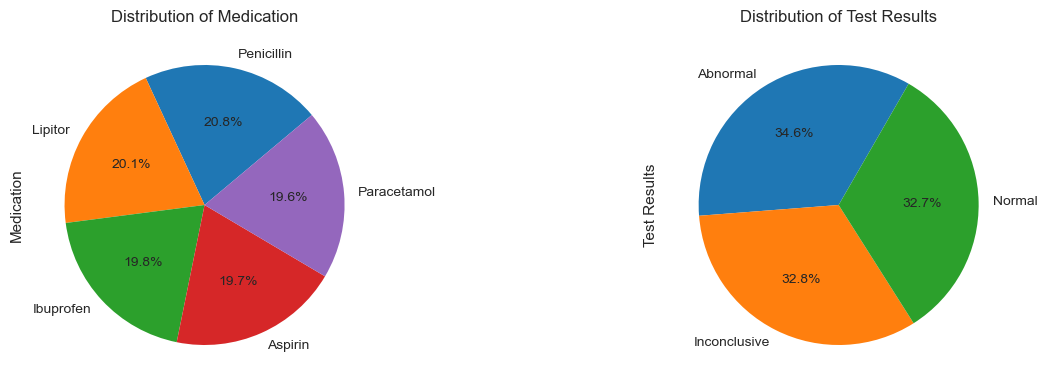

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Distribution of Medication')
df['Medication'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=40, colors=sns.color_palette('tab10'))
plt.subplot(2,2,2)
plt.title('Distribution of Test Results')
df['Test Results'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=60, colors=sns.color_palette('tab10'))
plt.show()

**Average Age by Medical Condition**

In [27]:
age_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()

fig = px.bar(age_condition, x= 'Medical Condition', y='Age', color='Medical Condition',
            title='Average Age by Medical Condition',
            labels={'Age': 'Average Age', 
                   'Medical Condition': 'Medical Condition'},
            color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [28]:
df_combined = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count')
fig = px.bar(df_combined, x='Medical Condition', y='Count', color='Medication', barmode='group',
            title='Medication Distribution by Medical Distribution', labels={'Count': 'Count', 'Medical Condition': 'Medical Condition'})
fig.show()

In [29]:
df_combined = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')
fig = px.bar(df_combined, x='Blood Type', y='Count', color='Medical Condition',
            barmode='group', title='Distribution of Patient by Blood Type and Medical Condition', 
            labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [30]:
df_combine = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')
fig = px.bar(df_combine, x='Blood Type', y='Count', color='Gender', barmode='group',
            title='Distribution of Patient Group by Blood Type and Gender',
            labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Gender':'Gender'})
fig.show()

In [31]:
df_combine = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')
fig = px.bar(df_combine, x='Admission Type', y='Count', color='Gender', barmode='group', 
             title='Distribution of Patient Count by Admission Type and Gender',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Gender':'Gender'})
fig.show()

In [32]:
df_combined = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')
fig = px.bar(df_combined, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
            title='Distribution of Patient Count by Admission Type and Medical Condition',
            labels={'Count':'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [33]:
df_combined = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')
fig = px.bar(df_combined, x='Test Results', y='Count', color='Admission Type', barmode='group',
            title='Distribution of Test Results by Admission Type',
            labels={'Count':'Count', 'Test Results': 'Test Results', 'Admission Type':'Admission Type'})
fig.show()

In [34]:
df_combined = df.groupby(['Medication', 'Gender']).size().reset_index(name='Count')
fig = px.bar(df_combined, x='Medication', y='Count', color='Gender', barmode='group',
            title='Distribution of Medication by Gender',
            labels={'Count':'Count', 'Medication': 'Medication', 'Gender':'Gender'})
fig.show()

**Machine Learning**

In [35]:
df.drop(['Name', 'Discharge Date', 'Date of Admission'], axis=1, inplace=True)

In [36]:
df

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration of Stay (Days)
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,Penicillin,Normal,20


In [37]:
cols_object = df.select_dtypes('object')

In [38]:
cols_object

,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
0,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,Elective,Aspirin,Inconclusive
1,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,Emergency,Lipitor,Normal
2,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,Emergency,Lipitor,Normal
3,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,Urgent,Penicillin,Abnormal
4,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,Urgent,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...
9995,Male,A+,Obesity,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,Elective,Ibuprofen,Abnormal
9996,Female,AB+,Arthritis,Christopher Yates,Nash-Krueger,Blue Cross,Emergency,Ibuprofen,Normal
9997,Male,B-,Arthritis,Robert Nicholson,Larson and Sons,Blue Cross,Elective,Ibuprofen,Normal
9998,Male,A+,Arthritis,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,Urgent,Penicillin,Normal


In [39]:
for c in cols_object:
    lb = LabelEncoder()
    df[c] = lb.fit_transform(df[[c]])

In [40]:
df

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration of Stay (Days)
0,81,0,7,3,7167,7960,3,37490.983364,146,0,0,1,14
1,35,1,6,1,2597,978,4,47304.064845,404,1,2,2,14
2,61,1,5,5,7180,7996,3,36874.896997,292,1,2,2,30
3,49,1,5,1,1169,2482,3,23303.322092,480,2,4,0,1
4,51,1,7,0,2775,3908,4,18086.344184,477,2,3,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,1,0,5,7926,8474,4,39606.840083,110,0,1,0,4
9996,47,0,2,0,1856,5394,1,5995.717488,244,1,1,2,23
9997,54,1,5,0,7655,4214,1,49559.202905,312,0,1,2,14
9998,84,1,0,0,3770,8420,4,25236.344761,420,2,4,2,20


In [41]:
X=df.drop('Test Results',axis = 1)
y=df['Test Results']

In [42]:
y.shape

(10000,)

In [43]:
X

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Duration of Stay (Days)
0,81,0,7,3,7167,7960,3,37490.983364,146,0,0,14
1,35,1,6,1,2597,978,4,47304.064845,404,1,2,14
2,61,1,5,5,7180,7996,3,36874.896997,292,1,2,30
3,49,1,5,1,1169,2482,3,23303.322092,480,2,4,1
4,51,1,7,0,2775,3908,4,18086.344184,477,2,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,1,0,5,7926,8474,4,39606.840083,110,0,1,4
9996,47,0,2,0,1856,5394,1,5995.717488,244,1,1,23
9997,54,1,5,0,7655,4214,1,49559.202905,312,0,1,14
9998,84,1,0,0,3770,8420,4,25236.344761,420,2,4,20


In [44]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)

In [45]:
models={'LogisticRegression': LogisticRegression(max_iter=2000),
       'RandomForestClassifier': RandomForestClassifier(),
       'KNeighborsClassifier': KNeighborsClassifier(),
       'DecisionTreeClassifier': DecisionTreeClassifier(),
       'GaussianNB': GaussianNB(),
       'Support Vector Machine': SVC()}

In [46]:
from tqdm import tqdm
# Fit models, predict and calculate accuracy and F1 score
results = []
models_name = []
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    models_name.append(name)
    results.append([accuracy,precision,recall,f1])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:09<00:00,  1.56s/it]


In [48]:
model_accuracy = pd.DataFrame(results, index=models_name, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [49]:
model_accuracy

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.3385,0.328293,0.3385,0.300614
RandomForestClassifier,0.3265,0.324270,0.3265,0.323798
KNeighborsClassifier,0.3290,0.324815,0.3290,0.319504
DecisionTreeClassifier,0.3200,0.319776,0.3200,0.319711
GaussianNB,0.3300,0.323473,0.3300,0.306049
Support Vector Machine,0.3455,0.119370,0.3455,0.177436


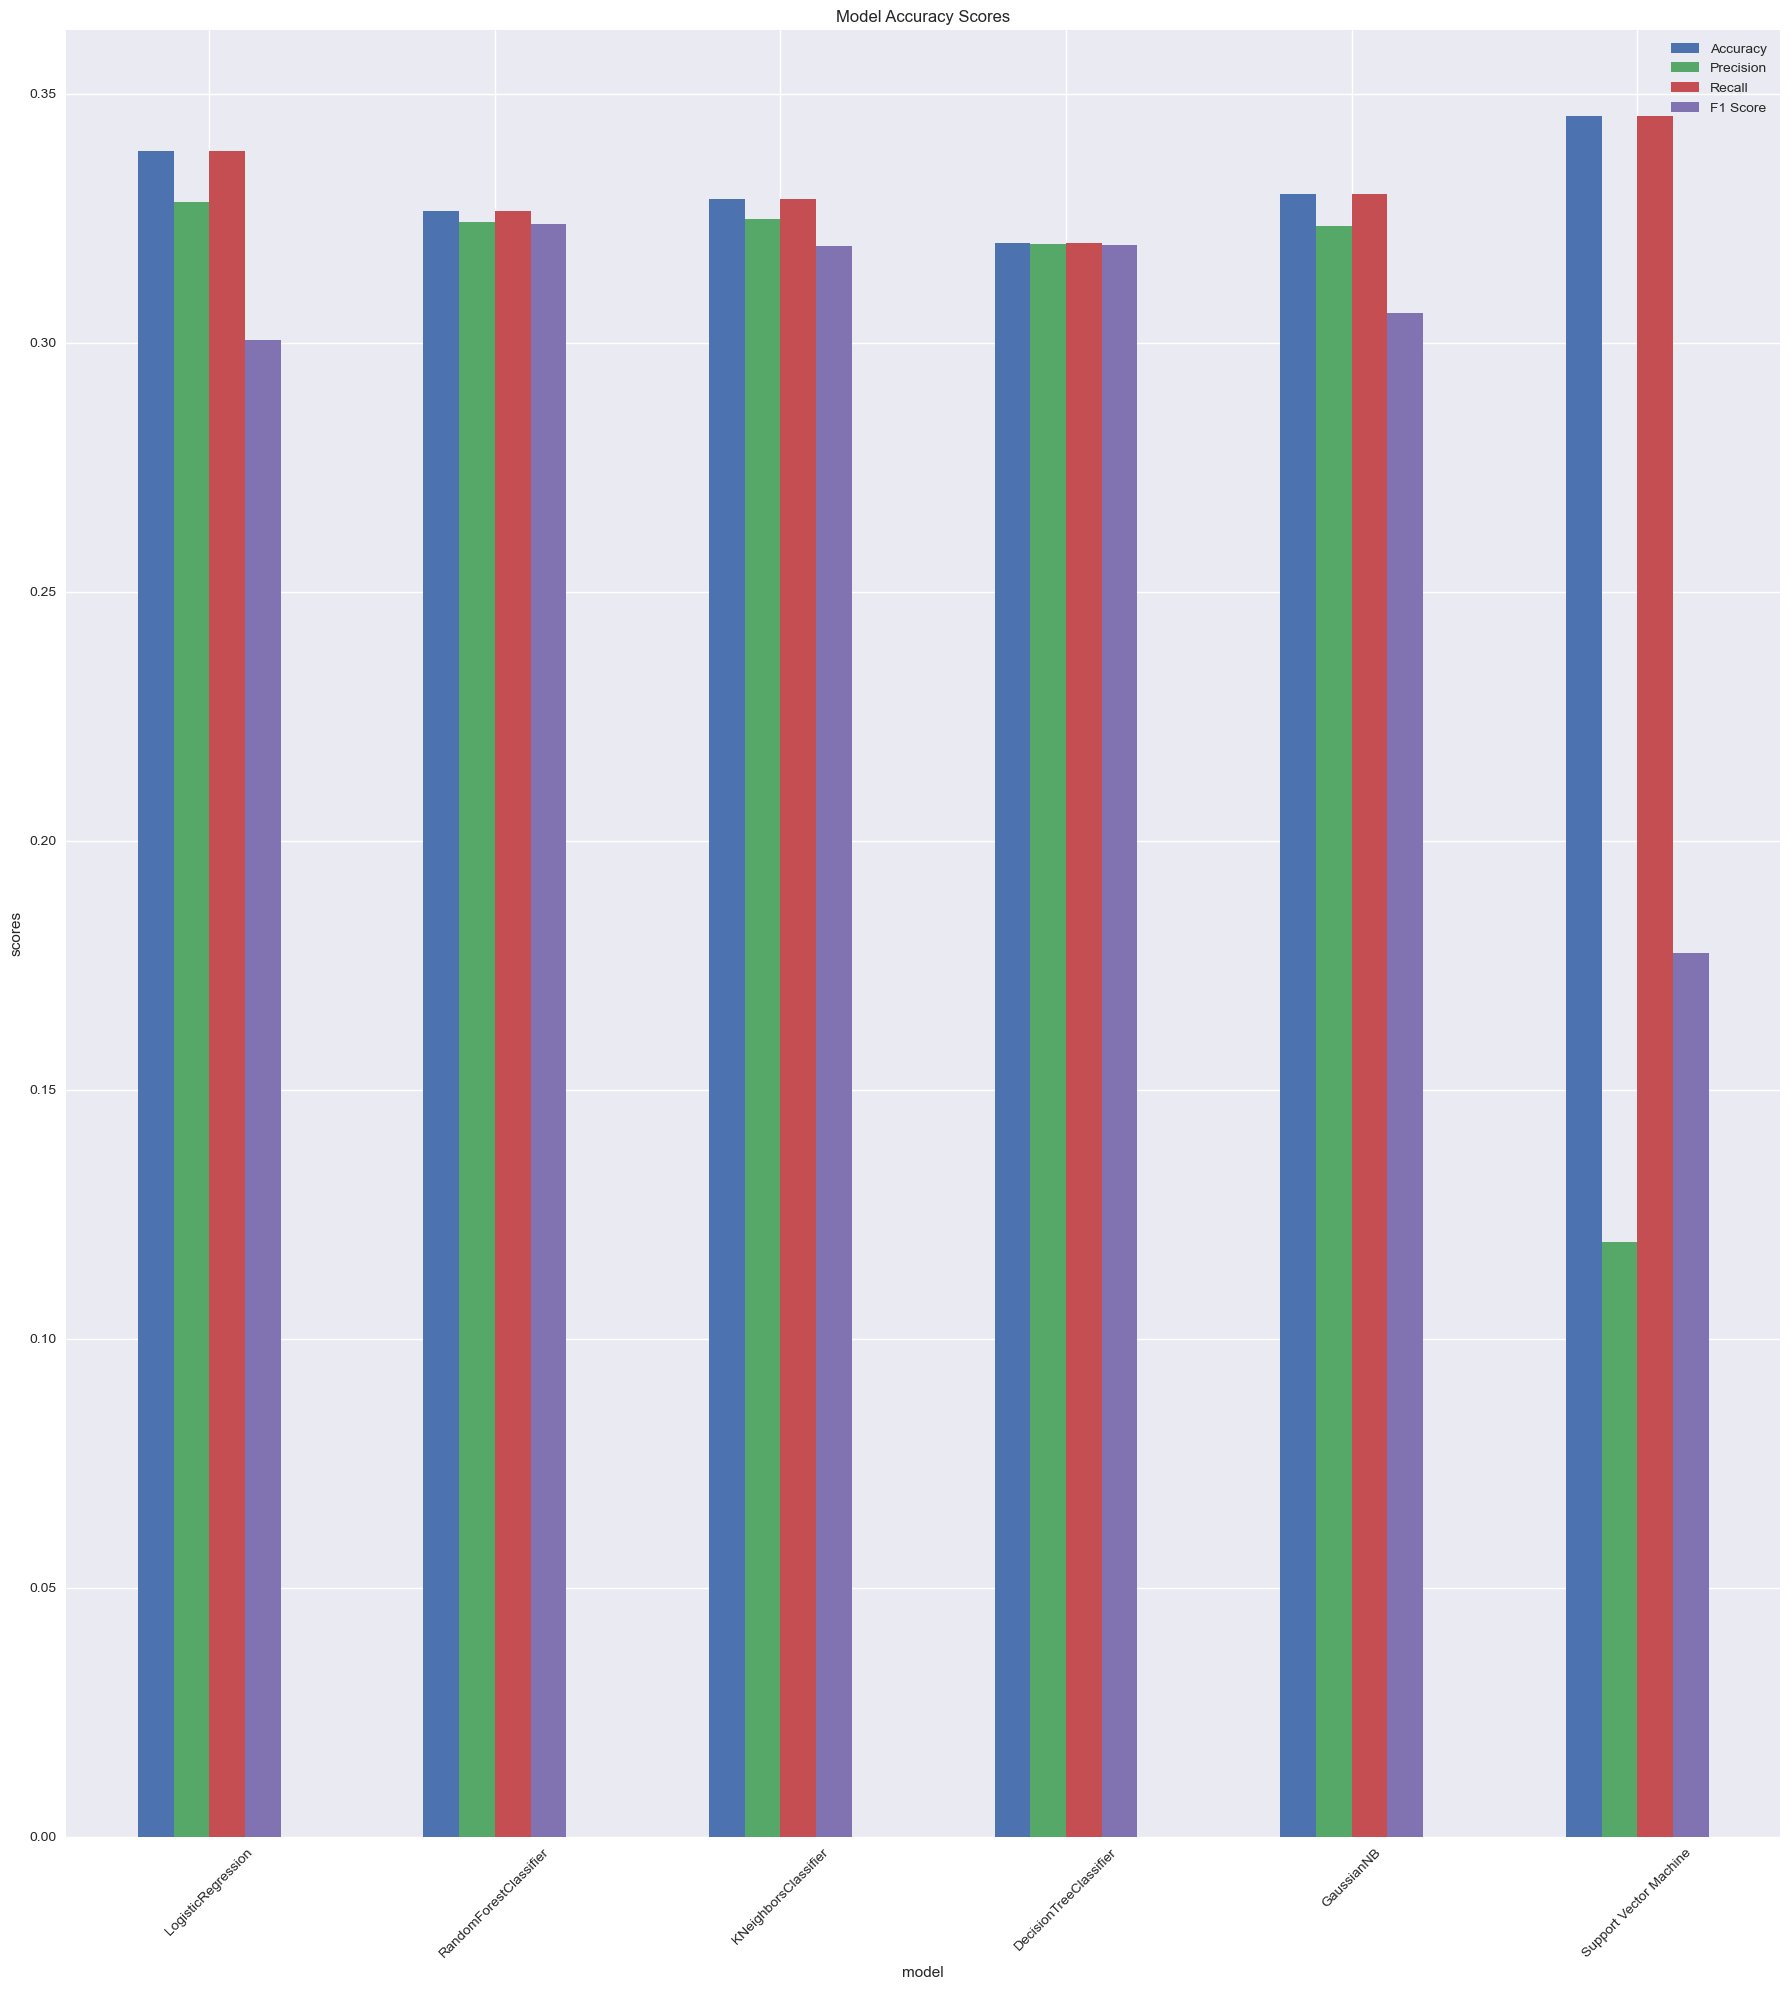

In [55]:
model_accuracy.plot(kind='bar', figsize=(18,20))

plt.xlabel('model')
plt.ylabel('scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()